In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
def fit_NeuralNetwork(X_train,y_train,alpha,hidden_layer_sizes,epochs):

    #Enter implementation here
    # Initialize the epoch errors
    err=np.zeros((epochs,1))

    # Initialize the architecture
    N, d = X_train.shape
    X0 = np.ones((N,1))
    X_train = np.hstack((X0,X_train))
    d=d+1
    L = len(hidden_layer_sizes)
    L=L+2

    #Initializing the weights for input layer
    weight_layer = np.random.normal(0, 0.1, (d,hidden_layer_sizes[0])) #np.ones((d,hidden_layer_sizes[0]))
    weights = []
    weights.append(weight_layer) #append(0.1*weight_layer)

    #Initializing the weights for hidden layers
    for l in range(L-3):
        weight_layer = np.random.normal(0, 0.1, (hidden_layer_sizes[l]+1,hidden_layer_sizes[l+1]))
        weights.append(weight_layer)

    #Initializing the weights for output layers
    weight_layer= np.random.normal(0, 0.1, (hidden_layer_sizes[l+1]+1,1))
    weights.append(weight_layer)

    for e in range(epochs):
        choiceArray=np.arange(0, N)
        np.random.shuffle(choiceArray)
        errN=0
        for n in range(N):
            index=choiceArray[n]
            x=np.transpose(X_train[index])
            #TODO: Model Update: Forward Propagation, Backpropagation
            # update the weight and calculate the error

            X,S = forwardPropagation(x,weights)
            g = backPropagation(X,y_train[index],S,weights)
            weights = updateWeights(weights, g, alpha)
            errN += errorPerSample(X, y_train[index])

        err[e]=errN/N
    return err, weights

In [3]:
def forwardPropagation(x, weights):
    #Enter implementation here
    l=len(weights)+1
    currX = x
    retS=[]
    retX=[]
    retX.append(currX)

    # Forward Propagate for each layer
    for i in range(l-1):

        currS= np.dot(currX, weights[i])
        retS.append(currS)
        currX=currS
        if i != len(weights)-1:
            for j in range(len(currS)):
                currX[j]= activation(currS[j])
            currX= np.hstack((1,currX))
        else:
            currX= outputf(currS)
        retX.append(currX)
    return retX,retS


In [4]:
def errorPerSample(X,y_n):
    #Enter implementation here
    err = errorf(X[len(X)-1],y_n)
    return err

In [5]:
def backPropagation(X,y_n,s,weights):
    #Enter implementation here
    #x:0,1,...,L
    #S:1,...,L
    #weights: 1,...,L
    l=len(X)
    delL=[]

    # To be able to complete this function, you need to understand this line below
    # In this line, we are computing the derivative of the Loss function w.r.t the
    # output layer (without activation). This is dL/dS[l-2]
    # By chain rule, dL/dS[l-2] = dL/dy * dy/dS[l-2] . Now dL/dy is the derivative Error and
    # dy/dS[l-2]  is the derivative output.
    delL.insert(0,derivativeError(X[l-1],y_n)*derivativeOutput(s[l-2]))
    curr=0

    # Now, let's calculate dL/dS[l-2], dL/dS[l-3],...
    for i in range(len(X)-2, 0, -1): #L-1,...,0
        delNextLayer=delL[curr]
        WeightsNextLayer=weights[i]
        sCurrLayer=s[i-1]

        #Init this to 0s vector
        delN=np.zeros((len(s[i-1]),1))

        #Now we calculate the gradient backward
        #Remember: dL/dS[i] = dL/dS[i+1] * W(which W???) * activation
        for j in range(len(s[i-1])): #number of nodes in layer i - 1
            for k in range(len(s[i])): #number of nodes in layer i
                #TODO: calculate delta at node j
                delN[j]=delN[j]+ WeightsNextLayer[j][k] * delNextLayer[k] * derivativeActivation(sCurrLayer[j])

        delL.insert(0,delN)

    # We have all the deltas we need. Now, we need to find dL/dW.
    # It's very simple now, dL/dW = dL/dS * dS/dW = dL/dS * X
    g=[]
    for i in range(len(delL)):
        rows,cols=weights[i].shape
        gL=np.zeros((rows,cols))
        currX=X[i]
        currdelL=delL[i]
        for j in range(rows):
            for k in range(cols):
                #TODO: Calculate the gradient using currX and currdelL
                gL[j,k]= np.dot(currX[j],currdelL[k])# Fill in here
        g.append(gL)
    return g

In [6]:
def updateWeights(weights,g,alpha):
    #Enter implementation here
    nW=[]
    for i in range(len(weights)):
        rows, cols = weights[i].shape
        currWeight=weights[i]
        currG=g[i]
        for j in range(rows):
            for k in range(cols):
                #TODO: Gradient Descent Update
                currWeight[j,k] -= (alpha*currG[j,k])
        nW.append(currWeight)
    return nW

In [7]:
def activation(s):
    if s > 0:
      return s
    else:
      return 0

In [8]:
def derivativeActivation(s):
    if s > 0:
      return 1
    else:
      return 0


In [9]:
def outputf(s):

    return 1 / (1 + np.exp(-s))

In [10]:
def derivativeOutput(s):
     return outputf(s)*(1-outputf(s))


In [11]:
def errorf(x_L,y):
  if y==1:
    return -1*(np.log(x_L))
  else:
    return -1*(np.log(1-x_L))


In [12]:
def derivativeError(x_L,y):
  if y == 1:
    return -1 / (x_L)
  else:
    return 1/(1 - x_L)


In [13]:
def pred(x_n,weights):

  X,S = forwardPropagation(x_n, weights)
  if  X[len(X) - 1][0] < 0.5:
    return -1
  else:
    return 1

In [14]:
def confMatrix(X_train,y_train,w):
  matrix = np.zeros((2,2))
  N = np.shape(X_train)[0]

  x_1 = np.ones((N, 1))
  X_train = np.hstack((np.ones((N, 1)), X_train))

  for i in range (N):

    pred_label = pred(X_train[i], w)

    if pred_label ==  y_train[i]:
      if pred_label == 1:
        #true postive
        matrix[1][1] += 1
      else:
        #true negative
         matrix[0][0] += 1
    else:
      if pred_label == 1:
        #true postive
        matrix[0][1] += 1
      else:
        #false negative
         matrix[1][0] += 1
  # matrix = matrix.astype(int)
  return matrix

In [15]:
def plotErr(e,epochs):
  # x_axis = np.arange(epochs)
  # plt.plot(x_axis, e, color='r')
  # plt.plot(epochs, e, color='r')
  epochs = list(range(1, epochs + 1))
  plt.plot(epochs, e, color='r')
  plt.xlabel('Epochs')
  plt.ylabel('Average error per epoch')

  plt.title('Average Error vs Epochs')
  plt.show()


In [16]:
def test_SciKit(X_train, X_test, Y_train, Y_test):
  model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(30,10), random_state=1)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)

  return confusion_matrix(Y_test, Y_pred)


<ipython-input-5-9c4ca00acf3c>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gL[j,k]= np.dot(currX[j],currdelL[k])# Fill in here


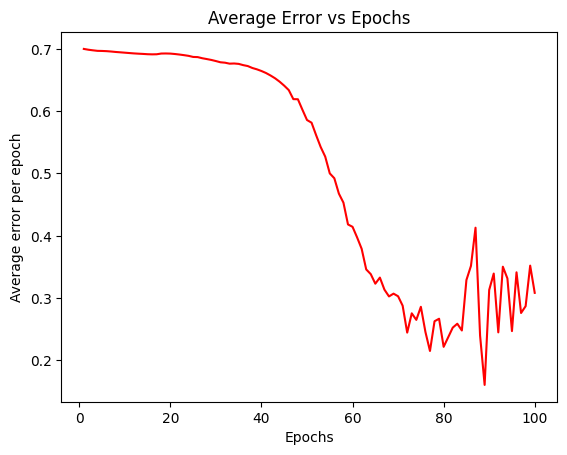

Confusion Matrix is from Part 1a is:  [[ 5.  3.]
 [ 0. 12.]]
Confusion Matrix from Part 1b is: [[ 7  1]
 [ 1 11]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
def test_Part1():
    from sklearn.datasets import load_iris
    X_train, y_train = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train[50:],y_train[50:],test_size=0.2, random_state=1)

    for i in range(80):
        if y_train[i]==1:
            y_train[i]=-1
        else:
            y_train[i]=1
    for j in range(20):
        if y_test[j]==1:
            y_test[j]=-1
        else:
            y_test[j]=1

    err,w=fit_NeuralNetwork(X_train,y_train,1e-2,[30, 10],100)

    plotErr(err,100)

    cM=confMatrix(X_test,y_test,w)

    sciKit=test_SciKit(X_train, X_test, y_train, y_test)

    print("Confusion Matrix is from Part 1a is: ",cM)
    print("Confusion Matrix from Part 1b is:",sciKit)

test_Part1()